In [30]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Dataset load, info and data summary
df = pd.read_csv('../data/AIRPOL_data.csv', delimiter=";", header=0, usecols=[*range(0,8)], decimal=',')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49140 entries, 0 to 49139
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       49140 non-null  object 
 1   NUTS_Code                     49140 non-null  object 
 2   Air_Pollutant                 49140 non-null  object 
 3   Outcome                       49140 non-null  object 
 4   Affected_Population           49140 non-null  float64
 5   Populated_Area[km2]           49140 non-null  float64
 6   Air_Pollution_Average[ug/m3]  49140 non-null  float64
 7   Value                         49140 non-null  float64
dtypes: float64(4), object(4)
memory usage: 3.0+ MB


,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Value
count,4.914000e+04,4.914000e+04,49140.000000,49140.000000
mean,1.023692e+06,6.534426e+03,15.138166,366.798657
std,9.085726e+06,5.661679e+04,22.579360,5494.481929
min,2.674000e+03,2.000000e+00,0.100000,0.000000
25%,1.069040e+05,5.697000e+02,7.200000,3.000000
50%,2.388280e+05,1.340100e+03,8.900000,23.000000
75%,5.988800e+05,4.215200e+03,11.400000,112.000000
max,4.680626e+08,2.687568e+06,125.700000,740933.000000


### Graphic exploration

In [22]:
# Filter the data so only the data of NUTS level 3 is studied

regex = r"^([A-Z]{2}[0-9]{3})"
df = df[df['NUTS_Code'].str.contains(regex)]
df.drop_duplicates
df.describe()

C:\Users\jfcar\AppData\Local\Temp\ipykernel_16284\1660861360.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['NUTS_Code'].str.contains(regex)]


,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Value
count,2.289900e+04,22899.000000,22899.000000,22899.000000
mean,2.790747e+05,1699.496262,15.253072,107.709769
std,4.049825e+05,2350.481411,22.278349,373.536537
min,2.674000e+03,11.200000,0.100000,0.000000
25%,9.163900e+04,478.800000,7.300000,2.000000
50%,1.763820e+05,901.800000,9.100000,15.000000
75%,3.379320e+05,2006.500000,11.700000,69.000000
max,9.488545e+06,36826.000000,112.600000,12289.000000


#### Univariate Analysis

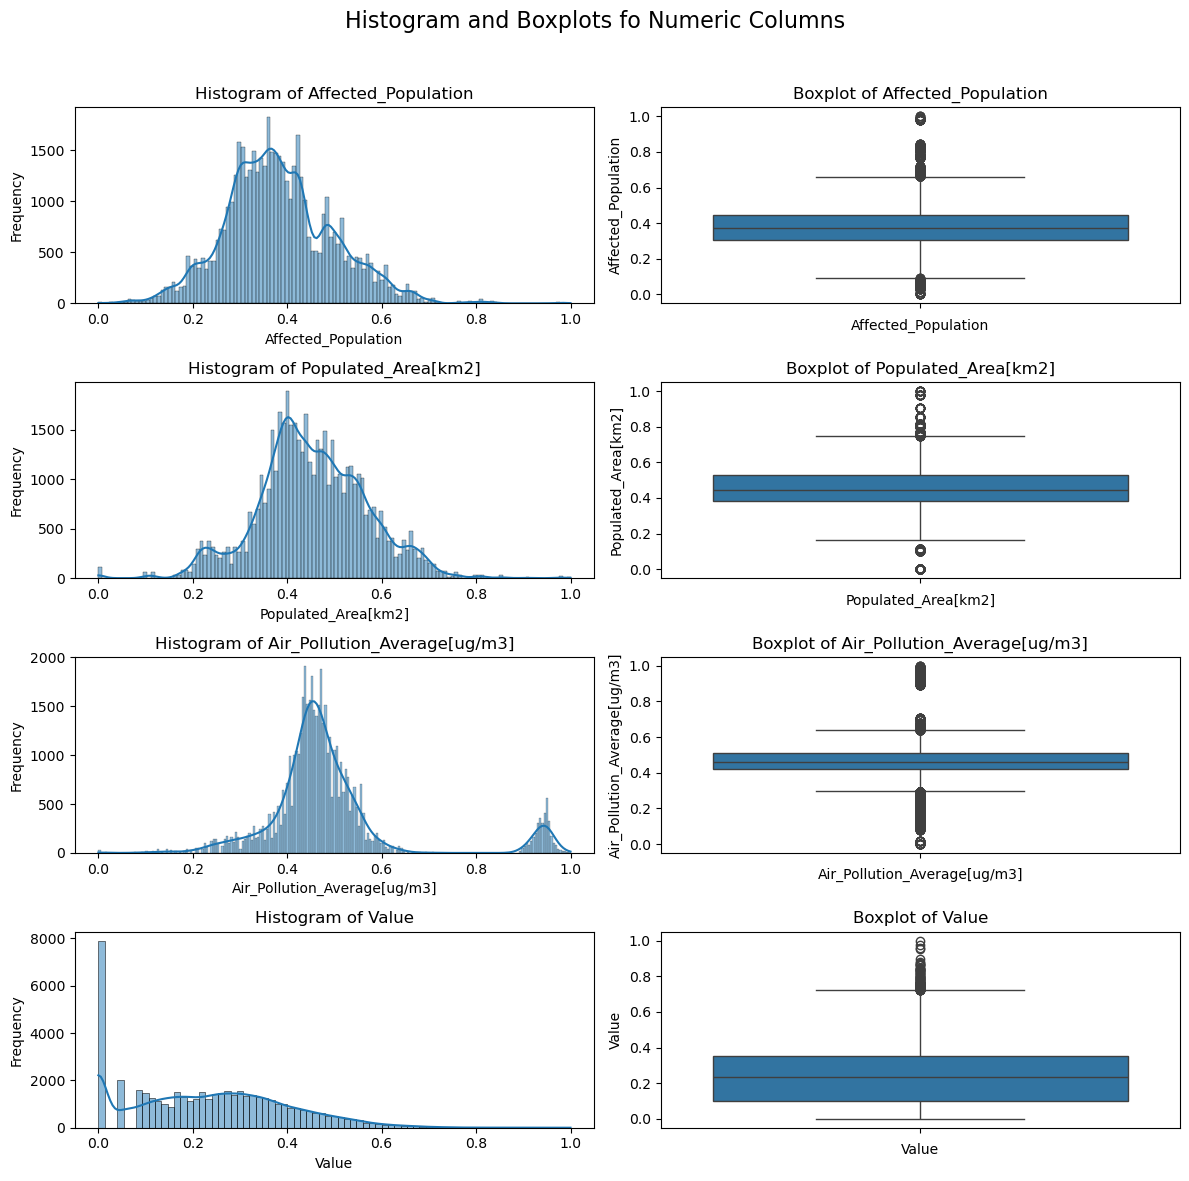

In [32]:
numericFeatures = ["Affected_Population", "Populated_Area[km2]", "Air_Pollution_Average[ug/m3]", "Value"]

# Apply log1p (log(1 + x)) to reduce the impact of extreme values
df_log = df[numericFeatures].apply(lambda x: np.log1p(x))

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_log), columns=numericFeatures)
numFeatures = len(numericFeatures)

# define layout for subplots
fig, axes = plt.subplots(nrows= numFeatures, ncols = 2, figsize=(12, 3 * numFeatures))
fig.suptitle('Histogram and Boxplots fo Numeric Columns', fontsize = 16)

# Loop through each column and create plots
for i, column in enumerate(numericFeatures):
    # Histogram
    sns.histplot(df_scaled[column], ax = axes[i, 0], kde=True)
    axes[i, 0].set_title(f"Histogram of {column}")
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel("Frequency")

    # Boxplot
    sns.boxplot(y=df_scaled[column], ax=axes[i, 1])
    axes[i, 1].set_title(f"Boxplot of {column}")
    axes[i, 1].set_xlabel(column)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Axes: xlabel='Country', ylabel='Número de Mortes Prematuras (em milhões)'>

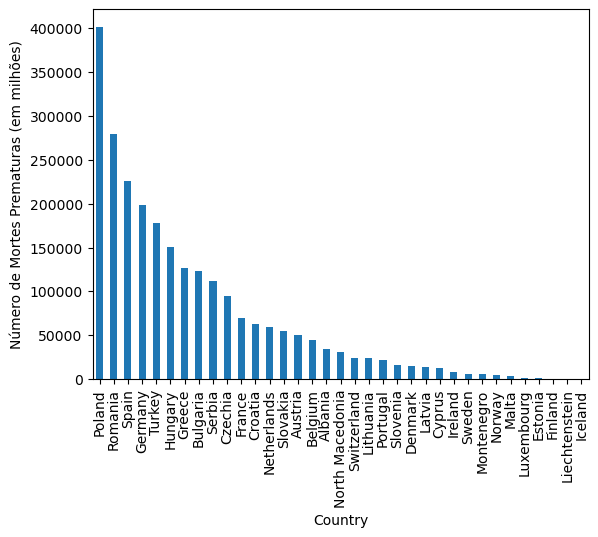

In [25]:
# This isn't an adequate graphic, needs to be in the millions
data_compare_deaths = df.drop(['Outcome','Affected_Population','Populated_Area[km2]'], axis = 1).drop_duplicates().drop(['NUTS_Code'], axis = 1).groupby("Country")["Value"].sum().sort_values(ascending=False)
data_compare_deaths.plot.bar(ylabel = 'Número de Mortes Prematuras (em milhões)')

### Bivariate Analysis

In [34]:
# goal attribute = value (number of premature deaths)
goalAttrib = 'Value'

numericFeatures = ["Affected_Population", "Populated_Area[km2]", "Air_Pollution_Average[ug/m3]"]

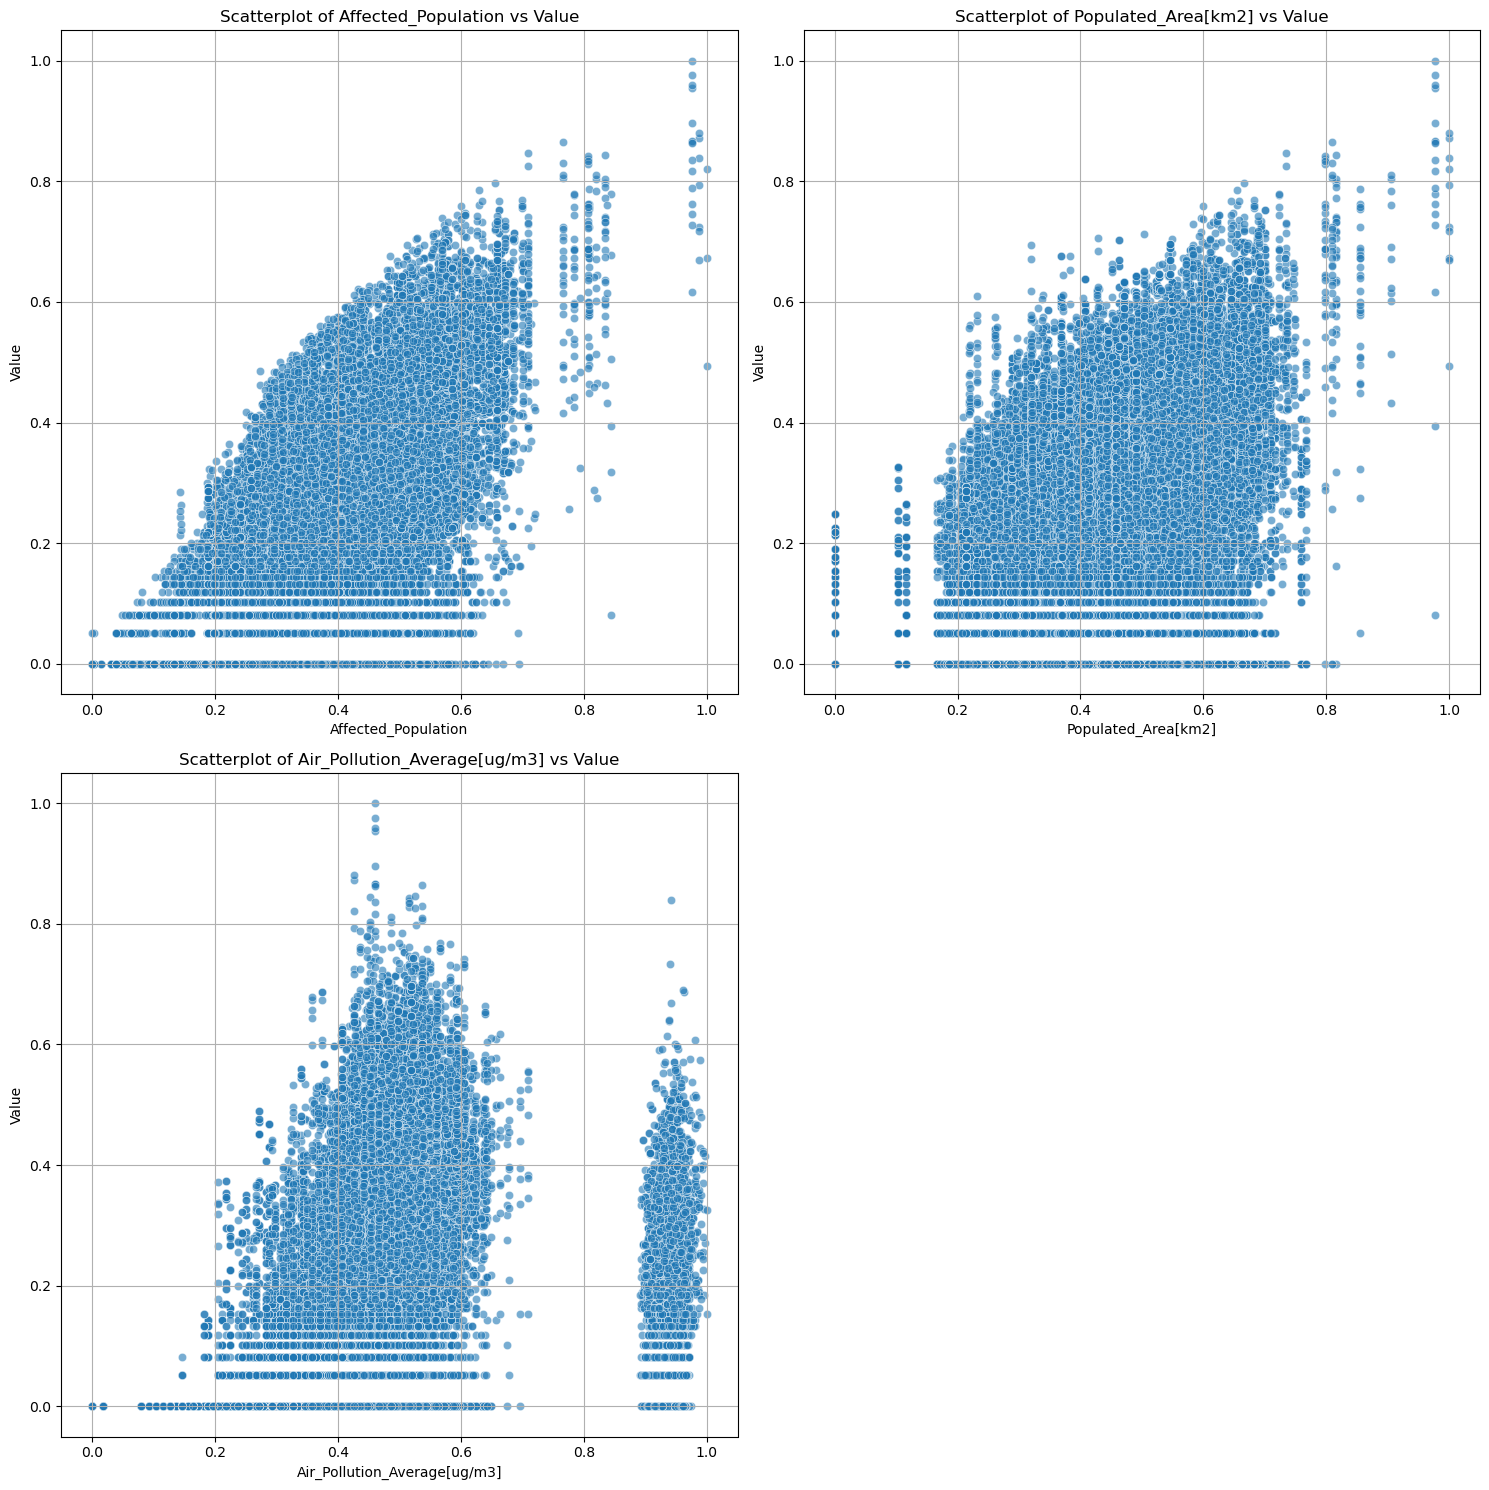

In [35]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(numericFeatures):
    rows = (len(numericFeatures) + 1) // 2 # Adjust rows to handle odd number of features

    plt.subplot(rows, 2, i + 1)

    sns.scatterplot(x=df_scaled[feature], y=df_scaled[goalAttrib], alpha=0.6)

    plt.title(f"Scatterplot of {feature} vs {goalAttrib}")
    plt.xlabel(feature)
    plt.ylabel(goalAttrib)
    plt.grid()

    # Create the boxplot using the palette
    # sns.boxplot(x='strength', y=feature, hue='strength', data=df)

plt.tight_layout()

### Pre-processing

### Country groups

In [27]:
western_europe = ["Austria", "Belgium", "France", "Germany", "Netherlands", "Switzerland"]
eastern_europe = ["Poland", "Czechia", "Hungary"]
southern_europe = ["Spain", "France", "Italy", "Greece"]
northern_europe = ["Sweden", "Denmark", "Northern Europe", "Finland"]